# Revision control software

J.R. Johansson (jrjohansson at gmail.com)

The latest version of this [IPython notebook](http://ipython.org/notebook.html) lecture is available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.io](http://jrjohansson.github.io).

In [2]:
from IPython.display import Image

In any software development, one of the most important tools are revision control software (RCS).

They are used in virtually all software development and in all environments, by everyone and everywhere (no kidding!)

RCS can used on almost any digital content, so it is not only restricted to software development, and is also very useful for manuscript files, figures, data and notebooks!



## There are two main purposes of RCS systems:

1. Keep track of changes in the source code.
    * Allow reverting back to an older revision if something goes wrong.
    * Work on several "branches" of the software concurrently.
    * Tags revisions to keep track of which version of the software that was used for what (for example, "release-1.0", "paper-A-final", ...)
2. Make it possible for serveral people to collaboratively work on the same code base simultaneously.
    * Allow many authors to make changes to the code.
    * Clearly communicating and visualizing changes in the code base to everyone involved.

## Basic principles and terminology for RCS systems

In an RCS, the source code or digital content is stored in a **repository**. 

* The repository does not only contain the latest version of all files, but the complete history of all changes to the files since they were added to the repository. 

* A user can **checkout** the repository, and obtain a local working copy of the files. All changes are made to the files in the local working directory, where files can be added, removed and updated. 

* When a task has been completed, the changes to the local files are **commited** (saved to the repository).

* If someone else has been making changes to the same files, a **conflict** can occur. In many cases conflicts can be **resolved** automatically by the system, but in some cases we might manually have to **merge** different changes together.

* It is often useful to create a new **branch** in a repository, or a **fork** or **clone** of an entire repository, when we doing larger experimental development. The main branch in a repository is called often **master** or **trunk**. When work on a branch or fork is completed, it can be merged in to the master branch/repository.

* With distributed RCSs such as GIT or Mercurial, we can **pull** and **push** changesets between different repositories. For example, between a local copy of there repository to a central online reposistory (for example on a community repository host site like github.com).

### Some good RCS software

1. GIT (`git`) : http://git-scm.com/
2. Mercurial (`hg`) : http://mercurial.selenic.com/

In the rest of this lecture we will look at `git`, although `hg` is just as good and work in almost exactly the same way.

## Installing git

On Linux:
    
    $ sudo apt-get install git

On Mac (with macports):

    $ sudo port install git

The first time you start to use git, you'll need to configure your author information:

    $ git config --global user.name 'Robert Johansson'
    $ git config --global user.email robert@riken.jp

## Creating and cloning a repository

To create a brand new empty repository, we can use the command `git init repository-name`:

In [3]:
# create a new git repository called gitdemo:
!git init gitdemo

Initialized empty Git repository in /p/project/ccstvs/jupyter/j4j_notebooks/001-Tutorials/004-Scientific-Python-Lectures/gitdemo/.git/


If we want to fork or clone an existing repository, we can use the command `git clone repository`:

In [4]:
!git clone https://github.com/qutip/qutip

Cloning into 'qutip'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 25813 (delta 16), reused 18 (delta 9), pack-reused 25775
Receiving objects: 100% (25813/25813), 19.09 MiB | 14.29 MiB/s, done.
Resolving deltas: 100% (17571/17571), done.


Git clone can take a URL to a public repository, like above, or a path to a local directory:

In [5]:
!git clone gitdemo gitdemo2

Cloning into 'gitdemo2'...
done.


We can also clone private repositories over secure protocols such as SSH:

    $ git clone ssh://myserver.com/myrepository

## Status

Using the command `git status` we get a summary of the current status of the working directory. It shows if we have modified, added or removed files.

In [6]:
!git status

# On branch master
# Your branch and 'origin/master' have diverged,
# and have 21 and 2 different commits each, respectively.
#   (use "git pull" to merge the remote branch into yours)
#
# Changes not staged for commit:
#   (use "git add/rm <file>..." to update what will be committed)
#   (use "git checkout -- <file>..." to discard changes in working directory)
#
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Animations Using clear_output.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Background Jobs.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Beyond Plain Python.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Capturing Output.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Cell Magics.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Custom Display Logic.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Cython Magics.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Plotting in th

In this case, only the current ipython notebook has been added. It is listed as an untracked file, and is therefore not in the repository yet.

## Adding files and committing changes

To add a new file to the repository, we first create the file and then use the `git add filename` command:

In [7]:
%%file README

A file with information about the gitdemo repository.

Overwriting README


In [8]:
!git status

# On branch master
# Your branch and 'origin/master' have diverged,
# and have 21 and 2 different commits each, respectively.
#   (use "git pull" to merge the remote branch into yours)
#
# Changes not staged for commit:
#   (use "git add/rm <file>..." to update what will be committed)
#   (use "git checkout -- <file>..." to discard changes in working directory)
#
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Animations Using clear_output.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Background Jobs.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Beyond Plain Python.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Capturing Output.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Cell Magics.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Custom Display Logic.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Cython Magics.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Plotting in th

After having added the file `README`, the command `git status` list it as an *untracked* file.

In [9]:
!git add README

In [10]:
!git status

# On branch master
# Your branch and 'origin/master' have diverged,
# and have 21 and 2 different commits each, respectively.
#   (use "git pull" to merge the remote branch into yours)
#
# Changes to be committed:
#   (use "git reset HEAD <file>..." to unstage)
#
#	modified:   README
#
# Changes not staged for commit:
#   (use "git add/rm <file>..." to update what will be committed)
#   (use "git checkout -- <file>..." to discard changes in working directory)
#
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Animations Using clear_output.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Background Jobs.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Beyond Plain Python.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Capturing Output.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Cell Magics.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Custom Display Logic.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPyth

Now that it has been added, it is listed as a *new file* that has not yet been commited to the repository.

In [11]:
!git commit -m "Added a README file" README

[master 8766e88] Added a README file
 1 file changed, 4 deletions(-)


In [12]:
!git add Lecture-7-Revision-Control-Software.ipynb

In [13]:
!git commit -m "added notebook file" Lecture-7-Revision-Control-Software.ipynb

[master 8c8e6ee] added notebook file
 1 file changed, 19 insertions(+), 1 deletion(-)


In [14]:
!git status 

# On branch master
# Your branch and 'origin/master' have diverged,
# and have 23 and 2 different commits each, respectively.
#   (use "git pull" to merge the remote branch into yours)
#
# Changes not staged for commit:
#   (use "git add/rm <file>..." to update what will be committed)
#   (use "git checkout -- <file>..." to discard changes in working directory)
#
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Animations Using clear_output.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Background Jobs.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Beyond Plain Python.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Capturing Output.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Cell Magics.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Custom Display Logic.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Cython Magics.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Plotting in th

After *committing* the change to the repository from the local working directory, `git status` again reports that working directory is clean.

## Commiting changes

When files that is tracked by GIT are changed, they are listed as *modified* by `git status`:

In [15]:
%%file README

A file with information about the gitdemo repository.

A new line.

Overwriting README


In [16]:
!git status

# On branch master
# Your branch and 'origin/master' have diverged,
# and have 23 and 2 different commits each, respectively.
#   (use "git pull" to merge the remote branch into yours)
#
# Changes not staged for commit:
#   (use "git add/rm <file>..." to update what will be committed)
#   (use "git checkout -- <file>..." to discard changes in working directory)
#
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Animations Using clear_output.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Background Jobs.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Beyond Plain Python.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Capturing Output.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Cell Magics.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Custom Display Logic.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Cython Magics.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Plotting in th

Again, we can commit such changes to the repository using the `git commit -m "message"` command.

In [17]:
!git commit -m "added one more line in README" README

[master 2e1435d] added one more line in README
 1 file changed, 2 insertions(+)


In [18]:
!git status

# On branch master
# Your branch and 'origin/master' have diverged,
# and have 24 and 2 different commits each, respectively.
#   (use "git pull" to merge the remote branch into yours)
#
# Changes not staged for commit:
#   (use "git add/rm <file>..." to update what will be committed)
#   (use "git checkout -- <file>..." to discard changes in working directory)
#
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Animations Using clear_output.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Background Jobs.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Beyond Plain Python.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Capturing Output.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Cell Magics.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Custom Display Logic.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Cython Magics.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Plotting in th

## Removing files

To remove file that has been added to the repository, use `git rm filename`, which works similar to `git add filename`:

In [19]:
%%file tmpfile

A short-lived file.

Writing tmpfile


Add it:

In [20]:
!git add tmpfile

In [21]:
!git commit -m "adding file tmpfile" tmpfile 

[master 5428217] adding file tmpfile
 1 file changed, 2 insertions(+)
 create mode 100644 001-Tutorials/004-Scientific-Python-Lectures/tmpfile


Remove it again:

In [22]:
!git rm tmpfile

rm '001-Tutorials/004-Scientific-Python-Lectures/tmpfile'


In [23]:
!git commit -m "remove file tmpfile" tmpfile 

[master d583266] remove file tmpfile
 1 file changed, 2 deletions(-)
 delete mode 100644 001-Tutorials/004-Scientific-Python-Lectures/tmpfile


## Commit logs

The messages that are added to the commit command are supposed to give a short (often one-line) description of the changes/additions/deletions in the commit. If the `-m "message"` is omitted when invoking the `git commit` message an editor will be opened for you to type a commit message (for example useful when a longer commit message is requried). 

We can look at the revision log by using the command `git log`:

In [24]:
!git log

commit d58326671f7049eab4ebfd40644c83aecfa7aa05
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Sun Jan 5 00:52:49 2020 +0100

    remove file tmpfile

commit 542821789f9c2d343227821d37616991ed953679
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Sun Jan 5 00:52:45 2020 +0100

    adding file tmpfile

commit 2e1435d02b21901817cc90c37eca47c5e8358498
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Sun Jan 5 00:52:36 2020 +0100

    added one more line in README

commit 8c8e6ee52caefb8a09e96bfb17d9e66f5b52b077
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Sun Jan 5 00:50:23 2020 +0100

    added notebook file

commit 8766e88c05afa4e12f4773adecf8f071f758656d
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Sun Jan 5 00:50:11 2020 +0100

    Added a README file

commit 933afa10292caa13dd16a2db5aaa9faecb6c54cc
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Sat Dec 21 14:22:22 2019 +0100

    added a 

In the commit log, each revision is shown with a timestampe, a unique has tag that, and author information and the commit message.

## Diffs

All commits results in a changeset, which has a "diff" describing the changes to the file associated with it. We can use `git diff` so see what has changed in a file:

In [25]:
%%file README

A file with information about the gitdemo repository.

README files usually contains installation instructions, and information about how to get started using the software (for example).

Overwriting README


In [26]:
!git diff README

diff --git a/001-Tutorials/004-Scientific-Python-Lectures/README b/001-Tutorials/004-Scientific-Python-Lectures/README
index 734ede0..1e85001 100644
--- a/001-Tutorials/004-Scientific-Python-Lectures/README
+++ b/001-Tutorials/004-Scientific-Python-Lectures/README
@@ -1,4 +1,4 @@
 
 A file with information about the gitdemo repository.
 
-A new line.
+README files usually contains installation instructions, and information about how to get started using the software (for example).


That looks quite cryptic but is a standard form for describing changes in files. We can use other tools, like graphical user interfaces or web based systems to get a more easily understandable diff.

In github (a web-based GIT repository hosting service) it can look like this:

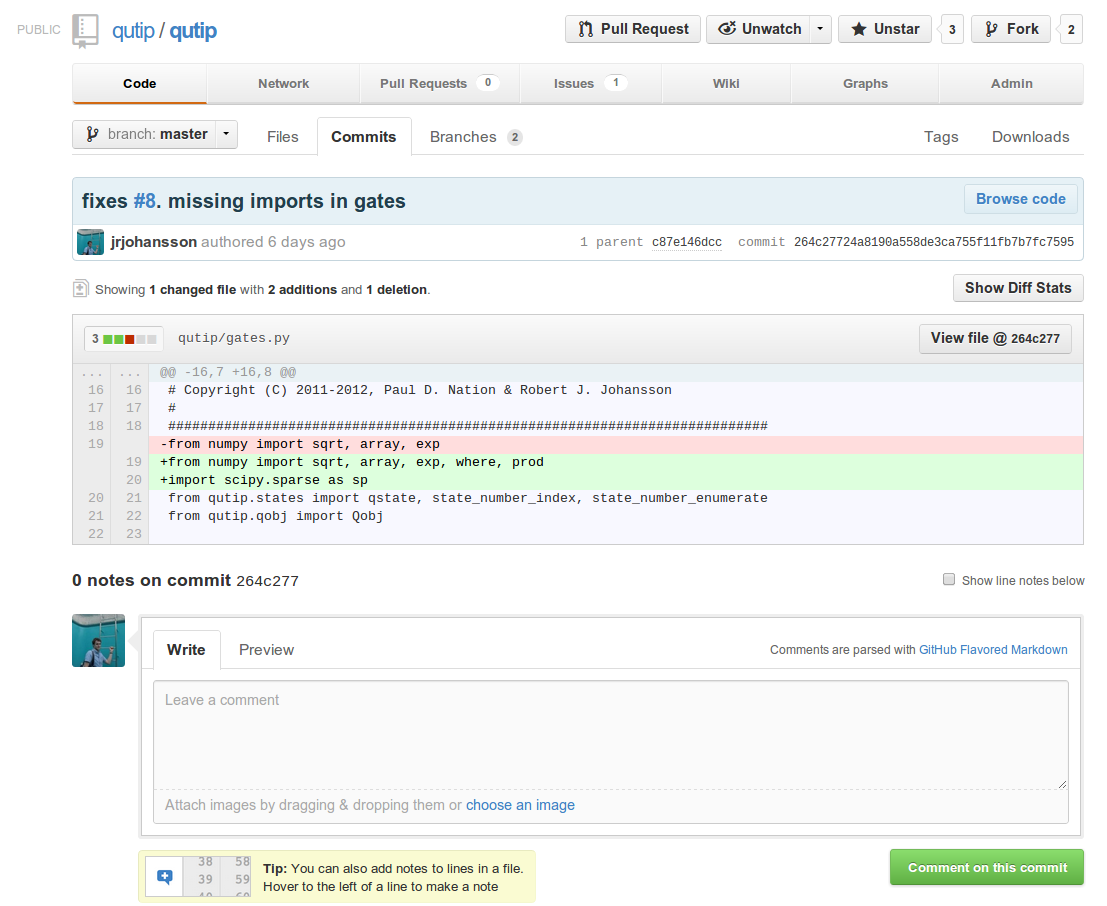

In [27]:
Image(filename='images/github-diff.png')

## Discard changes in the working directory

To discard a change (revert to the latest version in the repository) we can use the `checkout` command like this:

In [28]:
!git checkout -- README

In [29]:
!git status

# On branch master
# Your branch and 'origin/master' have diverged,
# and have 26 and 2 different commits each, respectively.
#   (use "git pull" to merge the remote branch into yours)
#
# Changes not staged for commit:
#   (use "git add/rm <file>..." to update what will be committed)
#   (use "git checkout -- <file>..." to discard changes in working directory)
#
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Animations Using clear_output.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Background Jobs.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Beyond Plain Python.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Capturing Output.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Cell Magics.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Custom Display Logic.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Cython Magics.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Plotting in th

## Checking out old revisions

If we want to get the code for a specific revision, we can use "git checkout" and giving it the hash code for the revision we are interested as argument:

In [30]:
!git log

commit d58326671f7049eab4ebfd40644c83aecfa7aa05
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Sun Jan 5 00:52:49 2020 +0100

    remove file tmpfile

commit 542821789f9c2d343227821d37616991ed953679
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Sun Jan 5 00:52:45 2020 +0100

    adding file tmpfile

commit 2e1435d02b21901817cc90c37eca47c5e8358498
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Sun Jan 5 00:52:36 2020 +0100

    added one more line in README

commit 8c8e6ee52caefb8a09e96bfb17d9e66f5b52b077
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Sun Jan 5 00:50:23 2020 +0100

    added notebook file

commit 8766e88c05afa4e12f4773adecf8f071f758656d
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Sun Jan 5 00:50:11 2020 +0100

    Added a README file

commit 933afa10292caa13dd16a2db5aaa9faecb6c54cc
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Sat Dec 21 14:22:22 2019 +0100

    added a 

In [31]:
!git checkout 1f26ad648a791e266fbb951ef5c49b8d990e6461

fatal: reference is not a tree: 1f26ad648a791e266fbb951ef5c49b8d990e6461


Now the content of all the files like in the revision with the hash code listed above (first revision)

In [32]:
!cat README


A file with information about the gitdemo repository.

A new line.


We can move back to "the latest" (master) with the command:

In [33]:
!git checkout master 

M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Animations Using clear_output.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Background Jobs.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Beyond Plain Python.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Capturing Output.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Cell Magics.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Custom Display Logic.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Cython Magics.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Plotting in the Notebook with Matplotlib.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Raw Input in the Notebook.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Rich Output.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Script Magics.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/SymPy.ipynb
M	001-Tutorials/001-Basic-Tutorials/001

In [34]:
!cat README


A file with information about the gitdemo repository.

A new line.


In [35]:
!git status

# On branch master
# Your branch and 'origin/master' have diverged,
# and have 26 and 2 different commits each, respectively.
#   (use "git pull" to merge the remote branch into yours)
#
# Changes not staged for commit:
#   (use "git add/rm <file>..." to update what will be committed)
#   (use "git checkout -- <file>..." to discard changes in working directory)
#
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Animations Using clear_output.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Background Jobs.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Beyond Plain Python.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Capturing Output.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Cell Magics.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Custom Display Logic.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Cython Magics.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Plotting in th

## Tagging and branching

### Tags

Tags are named revisions. They are useful for marking particular revisions for later references. For example, we can tag our code with the tag "paper-1-final" when when simulations for "paper-1" are finished and the paper submitted. Then we can always retreive the exactly the code used for that paper even if we continue to work on and develop the code for future projects and papers.

In [36]:
!git log

commit d58326671f7049eab4ebfd40644c83aecfa7aa05
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Sun Jan 5 00:52:49 2020 +0100

    remove file tmpfile

commit 542821789f9c2d343227821d37616991ed953679
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Sun Jan 5 00:52:45 2020 +0100

    adding file tmpfile

commit 2e1435d02b21901817cc90c37eca47c5e8358498
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Sun Jan 5 00:52:36 2020 +0100

    added one more line in README

commit 8c8e6ee52caefb8a09e96bfb17d9e66f5b52b077
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Sun Jan 5 00:50:23 2020 +0100

    added notebook file

commit 8766e88c05afa4e12f4773adecf8f071f758656d
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Sun Jan 5 00:50:11 2020 +0100

    Added a README file

commit 933afa10292caa13dd16a2db5aaa9faecb6c54cc
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Sat Dec 21 14:22:22 2019 +0100

    added a 

In [37]:
!git tag -a demotag1 -m "Code used for this and that purpuse" 

fatal: tag 'demotag1' already exists


In [38]:
!git tag -l 

demotag1


In [39]:
!git show demotag1

tag demotag1
Tagger: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Tue Dec 3 16:58:17 2019 +0100

Code used for this and that purpuse

commit 009451d93c29bf2b5ccc8ee512092b4ee72c1919
Author: Jens Henrik Göbbert <j.goebbert@fz-juelich.de>
Date:   Tue Dec 3 16:58:00 2019 +0100

    remove file tmpfile

diff --git a/001-Tutorials/004-Scientific-Python-Lectures/tmpfile b/001-Tutorials/004-Scientific-Python-Lectures/tmpfile
deleted file mode 100644
index 76810ac..0000000
--- a/001-Tutorials/004-Scientific-Python-Lectures/tmpfile
+++ /dev/null
@@ -1,2 +0,0 @@
-
-A short-lived file.


To retreive the code in the state corresponding to a particular tag, we can use the `git checkout tagname` command:

    $ git checkout demotag1

## Branches

With branches we can create diverging code bases in the same repository. They are for example useful for experimental development that requires a lot of code changes that could break the functionality in the master branch. Once the development of a branch has reached a stable state it can always be merged back into the trunk. Branching-development-merging is a good development strategy when serveral people are involved in working on the same code base. But even in single author repositories it can often be useful to always keep the master branch in a working state, and always branch/fork before implementing a new feature, and later merge it back into the main trunk.

In GIT, we can create a new branch like this:

In [40]:
!git branch expr1 

We can list the existing branches like this:

In [41]:
!git branch

  expr1
* master


And we can switch between branches using `checkout`:

In [42]:
!git checkout expr1

M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Animations Using clear_output.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Background Jobs.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Beyond Plain Python.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Capturing Output.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Cell Magics.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Custom Display Logic.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Cython Magics.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Plotting in the Notebook with Matplotlib.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Raw Input in the Notebook.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Rich Output.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Script Magics.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/SymPy.ipynb
M	001-Tutorials/001-Basic-Tutorials/001

Make a change in the new branch.

In [43]:
%%file README

A file with information about the gitdemo repository.

README files usually contains installation instructions, and information about how to get started using the software (for example).

Experimental addition.

Overwriting README


In [44]:
!git commit -m "added a line in expr1 branch" README

[expr1 ae12e06] added a line in expr1 branch
 1 file changed, 3 insertions(+), 1 deletion(-)


In [45]:
!git branch

* expr1
  master


In [46]:
!git checkout master

M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Animations Using clear_output.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Background Jobs.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Beyond Plain Python.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Capturing Output.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Cell Magics.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Custom Display Logic.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Cython Magics.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Plotting in the Notebook with Matplotlib.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Raw Input in the Notebook.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Rich Output.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Script Magics.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/SymPy.ipynb
M	001-Tutorials/001-Basic-Tutorials/001

In [47]:
!git branch

  expr1
* master


We can merge an existing branch and all its changesets into another branch (for example the master branch) like this:

First change to the target branch:

In [48]:
!git checkout master

M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Animations Using clear_output.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Background Jobs.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Beyond Plain Python.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Capturing Output.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Cell Magics.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Custom Display Logic.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Cython Magics.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Plotting in the Notebook with Matplotlib.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Raw Input in the Notebook.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Rich Output.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Script Magics.ipynb
M	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/SymPy.ipynb
M	001-Tutorials/001-Basic-Tutorials/001

In [49]:
!git merge expr1

Updating d583266..ae12e06
Fast-forward
 001-Tutorials/004-Scientific-Python-Lectures/README | 4 +++-
 1 file changed, 3 insertions(+), 1 deletion(-)


In [50]:
!git branch 

  expr1
* master


We can delete the branch `expr1` now that it has been merged into the master:

In [51]:
!git branch -d expr1

Deleted branch expr1 (was ae12e06).


In [52]:
!git branch

* master


In [53]:
!cat README


A file with information about the gitdemo repository.

README files usually contains installation instructions, and information about how to get started using the software (for example).

Experimental addition.


## pulling and pushing changesets between repositories

If the respository has been cloned from another repository, for example on github.com, it automatically remembers the address of the parant repository (called origin):

In [54]:
!git remote

origin


In [55]:
!git remote show origin

* remote origin
  Fetch URL: https://gitlab.version.fz-juelich.de/jupyter4jsc/j4j_notebooks.git
  Push  URL: https://gitlab.version.fz-juelich.de/jupyter4jsc/j4j_notebooks.git
  HEAD branch: master
  Remote branches:
    integration tracked
    master      tracked
  Local branch configured for 'git pull':
    master merges with remote master
  Local ref configured for 'git push':
    master pushes to master (local out of date)


### pull

We can retrieve updates from the origin repository by "pulling" changesets from "origin" to our repository:

In [56]:
!git pull origin

error: Your local changes to the following files would be overwritten by merge:
	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Animations Using clear_output.ipynb
	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Background Jobs.ipynb
	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Beyond Plain Python.ipynb
	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Capturing Output.ipynb
	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Cell Magics.ipynb
	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Custom Display Logic.ipynb
	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Cython Magics.ipynb
	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Plotting in the Notebook with Matplotlib.ipynb
	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Raw Input in the Notebook.ipynb
	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Rich Output.ipynb
	001-Tutorials/001-Basic-Tutorials/001-IPython-Kernel/Script Magics.ipynb
	001-Tutorials/001-Basic-Tutorials/00

We can register addresses to many different repositories, and pull in different changesets from different sources, but the default source is the origin from where the repository was first cloned (and the work origin could have been omitted from the line above).

### push

After making changes to our local repository, we can push changes to a remote repository using `git push`. Again, the default target repository is `origin`, so we can do:

In [57]:
!git status

# On branch master
# Your branch and 'origin/master' have diverged,
# and have 27 and 2 different commits each, respectively.
#   (use "git pull" to merge the remote branch into yours)
#
# Changes not staged for commit:
#   (use "git add/rm <file>..." to update what will be committed)
#   (use "git checkout -- <file>..." to discard changes in working directory)
#
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Animations Using clear_output.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Background Jobs.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Beyond Plain Python.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Capturing Output.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Cell Magics.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Custom Display Logic.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Cython Magics.ipynb
#	modified:   ../001-Basic-Tutorials/001-IPython-Kernel/Plotting in th

In [58]:
!git add Lecture-7-Revision-Control-Software.ipynb

In [59]:
!git commit -m "added lecture notebook about RCS" Lecture-7-Revision-Control-Software.ipynb

[master 6aa36d8] added lecture notebook about RCS
 1 file changed, 1502 insertions(+), 303 deletions(-)


!git push

## Hosted repositories

Github.com is a git repository hosting site that is very popular with both open source projects (for which it is free) and private repositories (for which a subscription might be needed).

With a hosted repository it easy to collaborate with colleagues on the same code base, and you get a graphical user interface where you can browse the code and look at commit logs, track issues etc. 

Some good hosted repositories are

* Github : http://www.github.com
* Bitbucket: http://www.bitbucket.org

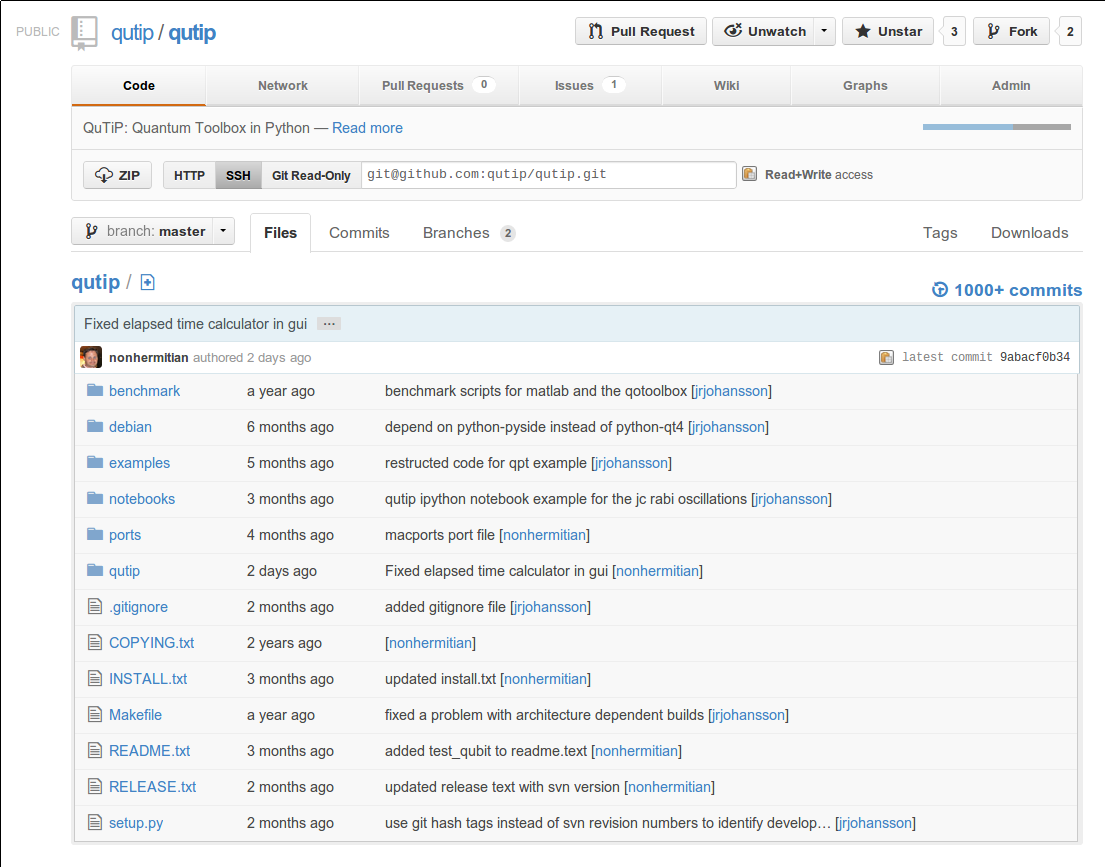

In [62]:
Image(filename='images/github-project-page.png')

## Graphical user interfaces

There are also a number of graphical users interfaces for GIT. The available options vary a little bit from platform to platform:

http://git-scm.com/downloads/guis

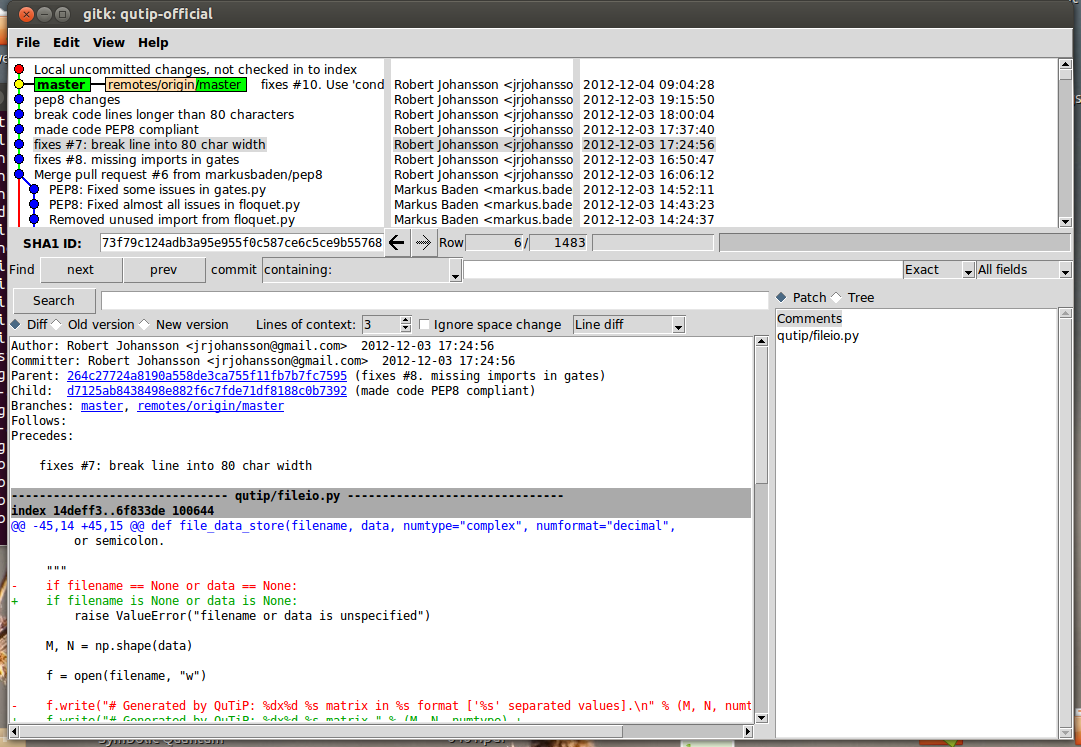

In [63]:
Image(filename='images/gitk.png')

## Further reading

* http://git-scm.com/book
* http://www.vogella.com/articles/Git/article.html
* http://cheat.errtheblog.com/s/git

## Cleanup

In [64]:
!rm -rf gitdemo
!rm -rf gitdemo2
!rm -rf qutip
!rm -f README